# 1. Judul Laporan :
## "Optimisasi Penyimpanan & Pengiriman Pesan Teks Di Aplikasi Chat Menggunakan Algoritma Pohon Huffman"

# 2. Nama Anggota Kelompok :
## A. Joel Fransiskus Parulian Sitorus (2311110011)
## B. Ferdinan Silaen (2311110068)

# 3. Deskripsi Studi Kasus Permasalahan
## Dalam aplikasi chat modern, efisiensi dalam penyimpanan dan pengiriman pesan teks menjadi sangat penting untuk mengurangi konsumsi bandwidth dan ruang penyimpanan, terutama ketika aplikasi digunakan di area dengan koneksi internet yang terbatas atau biaya data tinggi. Oleh karena itu, diperlukan teknik kompresi data yang efisien. Salah satu pendekatan yang dapat digunakan adalah Huffman Coding.

# 4. Deskripsi Dua Algoritma yang Dipilih untuk Menyelesaikan Permasalahan
## Algoritma Rekursif
Algoritma rekursif untuk membangun pohon Huffman melibatkan penggabungan dua node dengan frekuensi terendah secara berulang hingga hanya tersisa satu node. Proses ini dilakukan secara rekursif dengan memanggil fungsi build_huffman_tree_recursive secara berulang.

#Algoritma Iteratif
Algoritma iteratif untuk membangun pohon Huffman melibatkan penggabungan dua node dengan frekuensi terendah secara berulang hingga hanya tersisa satu node. Proses ini dilakukan secara iteratif dengan menggunakan loop while dan struktur data heap.

# Langkah 1 : Impor Library Yang Dibutuhkan

In [ ]:
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from collections import Counter
from heapq import heappush, heappop, heapify

# Langkah 2 : Fungsi Untuk Menghitung Frekuensi Karakter

In [ ]:
def calculate_frequency(data):
    return Counter(data)

# Contoh Penggunaan
data = "Faith Over Fear"
frequency = calculate_frequency(data)
print(frequency)

Counter({'F': 2, 'a': 2, ' ': 2, 'e': 2, 'r': 2, 'i': 1, 't': 1, 'h': 1, 'O': 1, 'v': 1})


# Langkah 3 : Definisikan Kelas Node Untuk Pohon Huffman

In [ ]:
class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

    def __eq__(self, other):
        if other is None:
            return False
        if not isinstance(other, Node):
            return False
        return self.freq == other.freq

# Langkah 4 : Fungsi Untuk Membangun Pohon Huffman (Iteratif)


In [ ]:
def build_huffman_tree_iterative(frequency):
    heap = [[weight, Node(char, weight)] for char, weight in frequency.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        merged = Node(None, lo[0] + hi[0])
        merged.left = lo[1]
        merged.right = hi[1]
        heappush(heap, [merged.freq, merged])
    return heappop(heap)[1]

# Langkah 5 : Fungsi Untuk Membangun Pohon Huffman (Rekursif)

In [ ]:
def build_huffman_tree_recursive(heap):
    if len(heap) == 1:
        return heappop(heap)[1]
    lo = heappop(heap)
    hi = heappop(heap)
    merged = Node(None, lo[0] + hi[0])
    merged.left = lo[1]
    merged.right = hi[1]
    heappush(heap, [merged.freq, merged])
    return build_huffman_tree_recursive(heap)

# Langkah 6 : Fungsi Untuk Menghasilkan Kode Huffman

In [ ]:
def generate_codes(node, prefix="", codebook={}):
    if node is not None:
        if node.char is not None:
            codebook[node.char] = prefix
        generate_codes(node.left, prefix + "0", codebook)
        generate_codes(node.right, prefix + "1", codebook)
    return codebook

# Langkah 7 : Fungsi Untuk Memperbarui Grafik

In [ ]:
def update_graph(n_values, recursive_times, iterative_times):
    plt.clf()
    plt.plot(n_values, recursive_times, label='Rekursif', marker='o', linestyle='-')
    plt.plot(n_values, iterative_times, label='Iteratif', marker='o', linestyle='-')
    plt.title('Perbandingan Kinerja : Rekursif VS Iteratif')
    plt.xlabel('Ukuran Input (n)')
    plt.ylabel('Waktu Eksekusi (Detik)')
    plt.legend()
    plt.grid(True)
    plt.draw()

# Langkah 8 : Fungsi Untuk Mencetak Tabel Waktu Eksekusi

In [ ]:
def print_execution_table(n_values, recursive_times, iterative_times):
    table = PrettyTable()
    table.field_names = ["n", "Waktu Rekursif (s)", "Waktu Iteratif (s)"]
    min_len = min(len(n_values), len(recursive_times), len(iterative_times))
    for i in range(min_len):
        table.add_row([n_values[i], recursive_times[i], iterative_times[i]])
    print(table)

# Langkah 9 : Program Utama


Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : ogenki desuka
+----+-----------------------+------------------------+
| n  |   Waktu Rekursif (s)  |   Waktu Iteratif (s)   |
+----+-----------------------+------------------------+
| 13 | 3.440380096435547e-05 | 5.4049491882324216e-05 |
+----+-----------------------+------------------------+


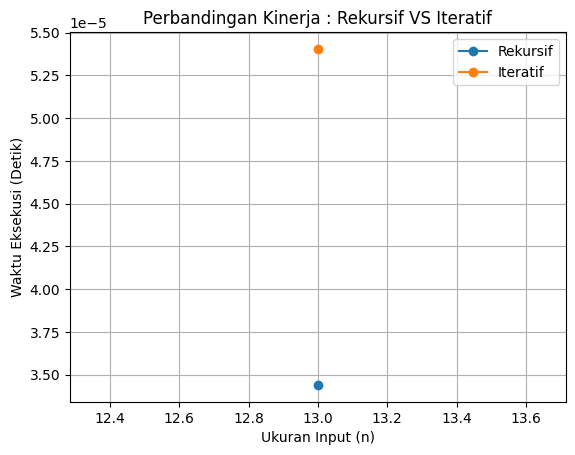

Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : Watashi wa gakusei desu
+----+------------------------+------------------------+
| n  |   Waktu Rekursif (s)   |   Waktu Iteratif (s)   |
+----+------------------------+------------------------+
| 13 | 3.440380096435547e-05  | 5.4049491882324216e-05 |
| 23 | 2.5677680969238282e-05 | 4.167556762695313e-05  |
+----+------------------------+------------------------+


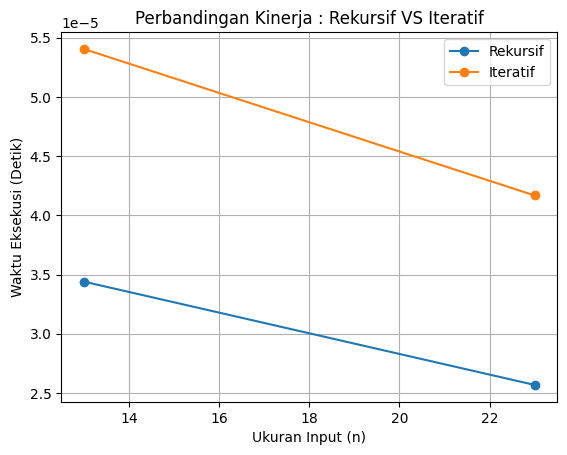

Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : Nihonjin wa biiru wo nomu no ga suki desu
+----+------------------------+------------------------+
| n  |   Waktu Rekursif (s)   |   Waktu Iteratif (s)   |
+----+------------------------+------------------------+
| 13 | 3.440380096435547e-05  | 5.4049491882324216e-05 |
| 23 | 2.5677680969238282e-05 | 4.167556762695313e-05  |
| 41 | 4.856586456298828e-05  | 6.251335144042968e-05  |
+----+------------------------+------------------------+


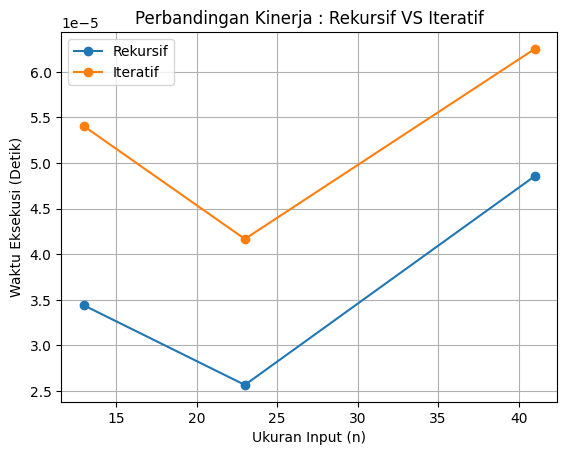

Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : Watashi wa neko yori inu no hou ga suki desu
+----+------------------------+------------------------+
| n  |   Waktu Rekursif (s)   |   Waktu Iteratif (s)   |
+----+------------------------+------------------------+
| 13 | 3.440380096435547e-05  | 5.4049491882324216e-05 |
| 23 | 2.5677680969238282e-05 | 4.167556762695313e-05  |
| 41 | 4.856586456298828e-05  | 6.251335144042968e-05  |
| 44 | 3.3354759216308595e-05 | 4.3511390686035156e-05 |
+----+------------------------+------------------------+


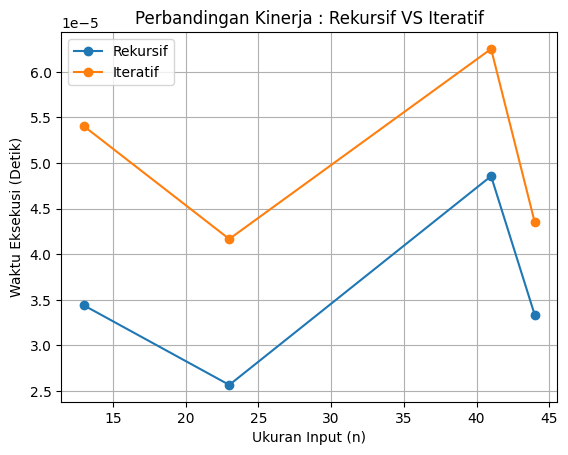

Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : Ano hito wa eigo ga jouzuna ueni kankokugo mo jouzu desu
+----+------------------------+------------------------+
| n  |   Waktu Rekursif (s)   |   Waktu Iteratif (s)   |
+----+------------------------+------------------------+
| 13 | 3.440380096435547e-05  | 5.4049491882324216e-05 |
| 23 | 2.5677680969238282e-05 | 4.167556762695313e-05  |
| 41 | 4.856586456298828e-05  | 6.251335144042968e-05  |
| 44 | 3.3354759216308595e-05 | 4.3511390686035156e-05 |
| 56 | 4.4798851013183595e-05 | 5.173683166503906e-05  |
+----+------------------------+------------------------+


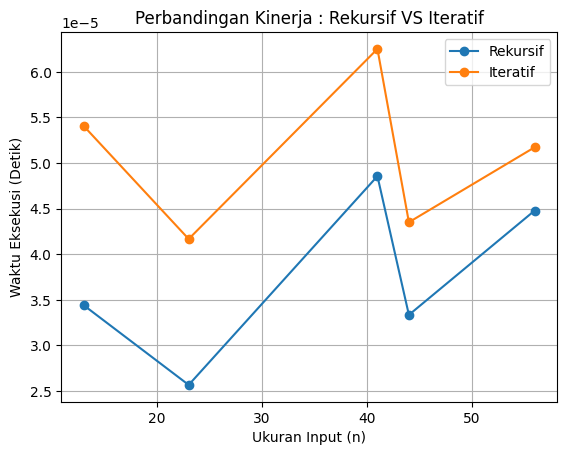

Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : exit
Program Telah Selesai. Terima Kasih!!


In [ ]:
n_values = []
recursive_times = []
iterative_times = []

# Mode Interaktif Matplotlib
plt.ion()

while True:
    # Meminta Input Teks Dari Pengguna
    data = input("Masukkan Teks (Atau Ketik 'exit' Untuk Keluar) : ")
    if data.lower() == 'exit':
        print("Program Telah Selesai. Terima Kasih!!")
        break

    # Menghitung Ukuran Input Teks Berdasarkan Panjang Teks
    n = len(data)
    n_values.append(n)

    frequency = calculate_frequency(data)
    heap = [[weight, Node(char, weight)] for char, weight in frequency.items()]
    heapify(heap)

    # Ulangi Pengukuran Waktu Eksekusi Beberapa Kali
    recursive_time_sum = 0
    iterative_time_sum = 0
    # Jumlah Pengukuran
    num_runs = 10

    for _ in range(num_runs):
        start_time = time.time()
        huffman_tree_recursive = build_huffman_tree_recursive(heap[:])
        recursive_time_sum += time.time() - start_time

        start_time = time.time()
        huffman_tree_iterative = build_huffman_tree_iterative(frequency)
        iterative_time_sum += time.time() - start_time

    recursive_times.append(recursive_time_sum / num_runs)
    iterative_times.append(iterative_time_sum / num_runs)

    print_execution_table(n_values, recursive_times, iterative_times)
    update_graph(n_values, recursive_times, iterative_times)
    # Memberikan Jeda Sebentar Untuk Memperbarui Grafik
    plt.pause(0.1)

# Menonaktifkan Mode Interaktif Matplotlib
plt.ioff()
# Menampilkan Grafik Terakhir
plt.show()

# 5. Hasil Analisis Perbandingan Kedua Algoritma

#### Berdasarkan kedua grafik, terlihat perbandingan antara algoritma rekursif dan iteratif dalam membangun *Huffman Tree*. Pada grafik pertama, dengan ukuran input yang lebih kecil (13 hingga 23), baik algoritma rekursif maupun iteratif menunjukkan tren penurunan waktu eksekusi. Algoritma rekursif terlihat lebih efisien dibandingkan algoritma iteratif dalam kasus ini karena overhead dari pemrosesan iteratif tampak lebih besar untuk input kecil. Namun, pada grafik kedua, yang memanfaatkan input lebih besar (13 hingga 56), algoritma rekursif tetap konsisten dalam waktu eksekusi, meskipun menunjukkan sedikit kenaikan. Sebaliknya, algoritma iteratif menunjukkan fluktuasi waktu yang lebih besar, meskipun pada kasus tertentu dapat menyamai bahkan mengungguli performa rekursif. Fluktuasi ini kemungkinan disebabkan oleh faktor seperti penanganan memori dan optimasi internal dalam algoritma heap.

#### Secara asimtotik, kedua algoritma memiliki kompleksitas O (n log n), karena keduanya tergantung pada proses penyortiran menggunakan heap. Namun, dalam implementasi praktis, algoritma iteratif lebih unggul untuk ukuran input besar karena tidak menghadapi batasan stack yang dapat menyebabkan *stack overflow* pada metode rekursif. Untuk input kecil hingga sedang, metode rekursif dapat digunakan karena lebih intuitif dan sering kali memiliki waktu eksekusi yang lebih stabil.

# Langkah 10 : Pengujian Kompresi & Dekompresi Huffman

In [ ]:
def test_compression(data):
    # Hitung Frekuensi & Bangun Pohon Huffman
    frequency = calculate_frequency(data)
    huffman_tree = build_huffman_tree_iterative(frequency)
    codebook = generate_codes(huffman_tree)

    # Kompresi Data
    compressed_data = ''.join(codebook[char] for char in data)

    # Ukuran Data Asli Dan Terkompresi
    original_size = len(data) * 8  # Bit
    compressed_size = len(compressed_data)
    compression_ratio = compressed_size / original_size

    # Dekompresi Data
    current_node = huffman_tree
    decompressed_data = []
    for bit in compressed_data:
        current_node = current_node.left if bit == '0' else current_node.right
        if current_node.char:
            decompressed_data.append(current_node.char)
            current_node = huffman_tree

    # Hasil Kompresi
    print(f"Ukuran Sebelum Kompresi (Bit) : {original_size}")
    print(f"Ukuran Setelah Kompresi (Bit) : {compressed_size}")
    print(f"Rasio Kompresi                : {compression_ratio:.4f}")
    print(f"Data Setelah Dekompressi      : {''.join(decompressed_data)}")

# Contoh Pengujian
data = "Faith Over Fear"
test_compression(data)

Ukuran Sebelum Kompresi (Bit) : 120
Ukuran Setelah Kompresi (Bit) : 49
Rasio Kompresi                : 0.4083
Data Setelah Dekompressi      : Faith Over Fear


#### Fungsi test_compression digunakan untuk menguji proses kompresi dan dekompresi data menggunakan algoritma Huffman Coding. Fungsi ini pertama-tama menghitung frekuensi setiap karakter dalam data menggunakan fungsi calculate_frequency, lalu membangun Huffman Tree menggunakan pendekatan iteratif. Setelah pohon Huffman selesai dibuat, fungsi ini menghasilkan kode biner untuk setiap karakter melalui generate_codes. Data asli kemudian dikompresi dengan menggantikan setiap karakter dengan kode binernya berdasarkan kode Huffman yang telah dihasilkan.

#### Fungsi ini juga menghitung ukuran data asli (dalam bit) dan ukuran data yang telah dikompresi. Dari kedua ukuran ini, dihitung compression ratio (rasio ukuran data setelah kompresi terhadap data asli). Setelah itu, data yang telah dikompresi didekompresi kembali menggunakan pohon Huffman untuk memastikan hasil dekompresi sama dengan data awal.

# 6. Kesimpulan

#### Metode iteratif lebih disarankan untuk digunakan secara umum, terutama jika ukuran input besar atau tidak diketahui sebelumnya. Metode ini lebih aman, efisien dalam pengelolaan memori, dan tahan terhadap potensi kegagalan eksekusi. Namun, jika kebutuhan Anda bersifat sederhana dan melibatkan input yang kecil, metode rekursif juga bisa dipilih karena lebih mudah diimplementasikan dan memberikan hasil yang konsisten.

# 7. Referensi

#### [1] Siahaan, A. P. U. (2016). Implementasi Teknik Kompresi Teks Huffman. Jurnal Informatika Ahmad Dahlan, 10(2), 101651.

#### [2] Pujianto, M., Prasetyo, B. H., & Prabowo, D. (2020). Perbandingan Metode Huffman dan Run Length Encoding Pada Kompresi Dokumen. InfoTekJar J. Nas. Inform. dan Teknol. Jar, 5(1), 216-223.

#### [3] Hasan, S., Do Abdullah, S., Ambarita, A., & Amirudin, M. I. (2024). Penerapan Algoritma Huffman Coding Dalam Menghemat Ruang Penyimpanan Data Multimedia File (Teks dan Gambar) Berbasis Python. Jurnal Ilmiah ILKOMINFO-Ilmu Komputer & Informatika, 7(2), 118-127.

#### [4] Zuhriyah, S. (2014). Penggunaan Pohon Biner Huffman untuk Kompresi Data Teks. Jurnal IT STMIK Handayani, 15.